<a href="https://colab.research.google.com/github/Clarana12/puc-ciencia-de-dados-e-analytics/blob/main/MVP_AnaClaraRodrigues.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sprint 1 - Análise de Dados e Boas Práticas
# Pontifícia Universidade Católica PUC-Rio
### Aluno (a). Ana Clara Rodrigues
#### MVP Sprint 1 (Dez/2023)



## 1.0 Definição do Problema
---

**Qual o objetivo desse MVP?**

A proposta desse MVP é explorar os motivos e comportamentos do indivíduo que podem ocasionar transtornos do sono utilizando os conhecimentos adquiridos nessa sprint. A ideia inicial é analisar informações que possam ser relevantes para que possamos antecipar e prever qual comportamento e estilo de vida pode está propenso a adquirir transtornos do sono.

**Como fazer isso?**

Nosso objetivo neste trabalho é realizar a análise exploratória e o pré-processamento dos dados de entrada, para que em etapas futuras possamos trabalhar com técnicas de aprendizado supervisionados no sentido de conseguir predições sobre possíveis comportamentos que nos geram transtornos do sono.

Em resumo, priorizar uma boa noite de sono é essencial para promover a saúde física e mental, garantindo um funcionamento otimizado do corpo e da mente. A falta de sono crônica pode ter sérias consequências para o bem-estar geral e deve ser abordada com a devida atenção.

A meta é reduzir a quantidade de indivíduos que são diagnosticados com transtornos do sono e demonstrar hábitos que possam auxiliar nesse processo.

**Sobre o *dataset* utilizado**

O dataset usado neste projeto será o **Conjunto de Dados de Saúde do Sono e Estilo de Vida** proveniente originalmente do https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/code?datasetId=3321433&sortBy=voteCount.

Como seus dados estão rotulados, trata-se de um **aprendizado supervisionado**. Não houve **restrições** ao selecionar os dados onde foi aproveitado todo o dataset.

Este conjunto de dados captura uma gama de variáveis relacionados ao sono e hábitos diários. Inclui detalhes como sexo, idade, ocupação, duração do sono, qualidade do sono, nível de atividade física, níveis de estresse, categoria de IMC, pressão arterial, frequência cardíaca, passos diários e presença ou ausência de distúrbios do sono.

**Informações sobre os atributos:**
1. **Person ID** - Um ID para cada indivíduo.
2. **Gender** - Gênero do indivíduo (Masculino/Feminino).
3. **Age** - A idade da pessoa em anos.
4. **Occupation** - A ocupação ou profissão da pessoa.
5. **Sleep Duration** - O número de horas que a pessoa dorme por dia. (horas)
6. **Quality of Sleep** - Uma classificação subjetiva da qualidade do sono, variando de 1 a 10. (escala: 1-10)
7. **Physical Activity Level** - O número de minutos que a pessoa pratica atividade física diariamente. (minutos/dia)
8. **Stress Level** - Uma classificação subjetiva do nível de estresse vivenciado pela pessoa, variando de 1 a 10. (escala: 1-10)
9. **BMI Category** - A categoria de IMC da pessoa (por exemplo, Abaixo do Peso, Normal, Sobrepeso).
10. **Blood Pressure** - A medição da pressão arterial da pessoa, indicada como pressão sistólica sobre pressão diastólica. (systolic/diastolic)
11. **Heart Rate** - A frequência cardíaca em repouso da pessoa em batimentos por minuto. (bpm)
12. **Daily Steps** - O número de passos que a pessoa dá por dia.
13. **Sleep Disorder** - A presença ou ausência de um distúrbio do sono na pessoa (Nenhum, Insônia, Apneia do Sono).


Nessa seção inicial importaremos bibliotecas que utilizaremos no decorrer do MVP.



In [34]:
# Fazendo os imports das bibliotecas
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib as mpl
import matplotlib.pyplot as plt
import missingno as ms # para tratamento de missings
import seaborn as sns

Verificaremos a versão da matplotlib instalada.

In [35]:
# Verificando a versão da matplotlib instalada
print(f"A versão MatPlotLib instalada é a {mpl.__version__}")

A versão MatPlotLib instalada é a 3.7.1


Também configuraremos o MVP para não exibir mensagens de aviso.

In [36]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

## 2.0 Carga de Dados
---
Nessa seção iremos usar a biblioteca Pandas (*Python Data Analysis Library*) para carregar de um arquivo .csv disponível online.

Com o dataset carregado, iremos explorá-lo um pouco.

In [37]:
# Importando o arquivo em formato csv hospedado em meu Github
url = "https://raw.githubusercontent.com/Clarana12/Ciencia-de-dados-e-analytics/main/Sleep_health_and_lifestyle_dataset.csv"

lifestyle_data = pd.read_csv(url,delimiter = ',')


In [38]:
lifestyle_data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,6,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,6,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## 3.0 Análise de Dados
---
Nesta primeira etapa será realizada uma análise descritiva do dataset, onde iremos verificar como os dados estão organizados e como eles se relacionam, serão determinadas as suas dimensões, tipos de variáveis (qualitativas e quantitativas), além de uma primeira avaliação estatísticas dos dados numéricos.

### 3.1 Estatísticas Descritivas
---
Vamos iniciar examinando as dimensões do dataset, suas informações e alguns exemplos de linhas.

Checaremos a seguir o número de linhas e colunas do *dataset*.

In [39]:
# Mostra as dimensões (linhas e colunas) do dataset
print(lifestyle_data.shape)

(374, 13)


Podemos verificar acima que o dataset tem 374 linhas (entradas) de 13 colunas (atributos).



Checaremos a identificação dos nomes dos atributos de coluna no *dataset*.

In [40]:
# Mostrando o nome dos atributos do dataset
lifestyle_data.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

Mostraremos a seguir a estrutura dos atributos do *dataset*. Com essas informações verificaremos os tipos dos atributos do *dataset* para identificar quais deles poderemos fazer suas possíveis conversões.


In [41]:
# Mostra as informações do dataset
print(lifestyle_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB
None


Podemos verificar acima que o dataset possui 5 colunas de string e o restante é numérico em termos de tipo de dados. E não existem valores **nulos**.




In [42]:
# Mostra as 5 primeiras linhas do dataset
lifestyle_data.head(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,6,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,6,4,30,8,Obese,140/90,85,3000,Sleep Apnea


Com base nas primeiras linhas do dataset analisando os atributos BMI Category, Blood Pressure, Daily Steps e Sleep Disorder nos chama atenção que dos 5 indivíduos demonstrados 2 possuem Apneia do sono.
Ao analisar visualmente e de forma breve a tabela acima vimos que ambos possuem os mesmos atributos (BMI Category, Blood Pressure, Daily Steps e Sleep Disorder).
Onde é possível dizer que a Categoria de IMC (obesidade), pressão arterial (140/90) e os passos diários (3000) está relativamente ligado ao quadro de Apneia do sono.

In [43]:
# Mostra as 5 últimas linhas do dataset
lifestyle_data.tail(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
369,370,Female,59,Nurse,8,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


Verificaremos agora qual o valor mais frequente para cada atributo do conjunto de dados do *dataset*.

In [44]:
# Calculando o valor da moda (valor mais frequente) para cada um dos 13 atributos
moda = lifestyle_data.mode()
moda[:1]

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,43,Nurse,7,8,60,3,Normal,130/85,68,"8,000",None


Realizaremos um resumo estatístico do *dataset* dos atributos numéricos, mostrando valores numéricos sem ponto decimal para melhor visualização.

In [45]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
pd.set_option( 'float_format', '{:,.0f}'.format)
lifestyle_data.describe()


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374,374,374,374,374,374,374,374
mean,188,42,7,7,59,5,70,"6,817"
std,108,9,1,1,21,2,4,"1,618"
min,1,27,6,4,30,3,65,"3,000"
25%,94,35,6,6,45,4,68,"5,600"
50%,188,43,7,7,60,5,70,"7,000"
75%,281,50,8,8,75,7,72,"8,000"
max,374,59,8,9,90,8,86,"10,000"


Verificaremos abaixo o número de valores únicos de cada atributo.

In [46]:
# Verificando o número de valores únicos dos atributos
lifestyle_data.nunique()

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               3
dtype: int64

Percebemos que o nosso *dataset* não possui atributo de coluna com um único valor. E apenas o atributo "Gender" possuem dois valores, que são "Male" ou "Female", que representa o gênero do indivíduo.

Outra observação que é possível fazer, em "Person ID", é que esse atributo possui o mesmo número de valores que linhas do nosso *dataset*, podendo ser chamado de chave única primária, não servindo como dado estatístico.

Isso também nos leva a perceber que não há redundância de linhas no nosso *dataset*.

### 3.2 Visualizações Unimodais
---
Faremos nessa seção perguntas e análises gráficas baseadas apenas em um atributo.


**Qual é a idade média dos indivíduos no dataset?**

---





In [47]:
# Calculando a idade média dos individuos avaliados no dataset
media_de_idade_do_cliente = lifestyle_data[ 'Age' ].mean()
print(f"A idade média dos indivíduos é {media_de_idade_do_cliente:,.0f} anos")

A idade média dos indivíduos é 42 anos


O valor obtido da idade média se mostrou muito representativo, tendo em vista que o valor da moda da idade (valor mais frequente) foi 43.

Pelo gráfico abaixo perceberemos melhor a distribuição  da idade.

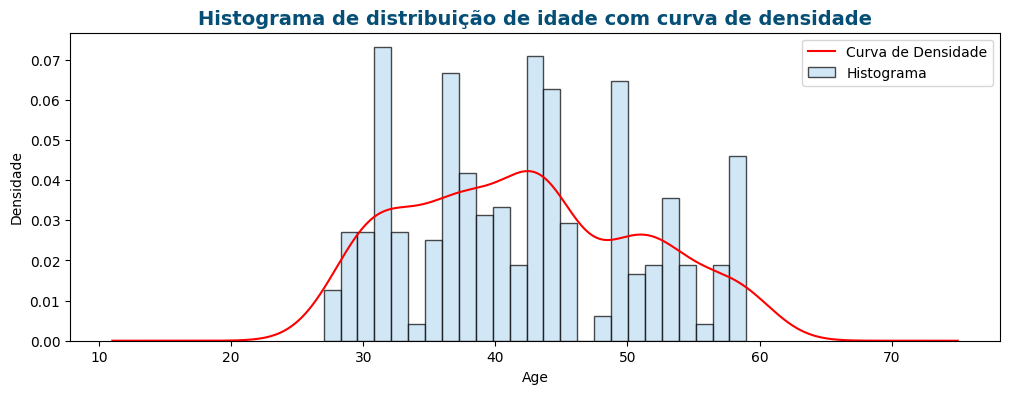

In [48]:
# Plotando um histograma de distribuição de idade com curva de densidade sobreposta
fig, ax = plt.subplots(figsize = (12, 4))
ax.hist(lifestyle_data[ 'Age' ], bins = 25, edgecolor = 'black', alpha = 0.7, color = '#BFDDF3', density = True)
lifestyle_data[ 'Age' ].plot(kind = 'kde', color = 'red', ax = ax)

# Definindo as linhas gerais do gráfico
ax.set_xlabel( 'Age' )
ax.set_ylabel( 'Densidade' )
ax.set_title( 'Histograma de distribuição de idade com curva de densidade', weight = "bold", color = "#054F77", fontsize = 14 )
ax.legend([ 'Curva de Densidade', 'Histograma' ])
plt.show()

A base de dados revela uma consistência admirável nas idades, ao mesmo tempo em que mantém uma distinção que contribui para a diversidade.

**Qual é o gênero que mais se destaca no dataset?**

---
Para responder esse questionamento iremos utilizar o gráfico de pizza que irá demostrar a proporção do gênero dos indivíduos  avaliados.





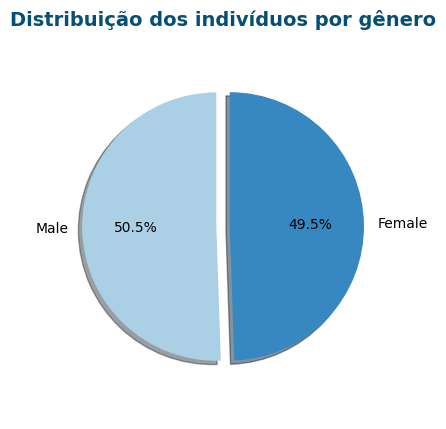

In [49]:
# Plotando um gráfico de pizza mostrando a proporção do genero dos individuos
counts = lifestyle_data[ 'Gender' ].value_counts()
rotulos = counts.index
explode = (0, 0.1)

# Obtenha uma paleta de cores de tons de azul usando seaborn
tons_de_azul = sns.color_palette("Blues", len(rotulos))

# Definindo as linhas gerais do gráfico
plt.figure(figsize = (4, 5))
plt.pie(x = counts, labels = rotulos, explode = explode, autopct = '%1.1f%%', startangle=90, shadow=True, colors=tons_de_azul)
plt.title( 'Distribuição dos indivíduos por gênero' , weight = "bold", color = "#054F77", fontsize = 14)
plt.axis( 'equal' )
plt.show()

Os dados de gênero mostram uma igualdade notável, sem que nenhum gênero se sobressaia de maneira significativa.


**Qual é a faixa etária que mais se destaca no dataset?**

---
Para responder esse questionamento iremos utilizar o gráfico de pizza que irá demostrar a proporção do gênero dos indivíduos avaliados.


Com uma faixa de dados muito ampla, o atributo de coluna "Age" é um sério candidato à categorização. Nesse caso criaremos um novo atributo de coluna "Cat_Age" do tipo *category* com valores do atributo numérico "Age". Serão separados em uma das 3 categorias: adulto (27-37 anos), meia-idade (38-50 anos) e idoso (51-59 anos).

In [50]:
# Categorizando o atributo de coluna "Age"
# 'Adulto': 27-37 anos
# 'Meia-idade': 38-50 anos
# 'Idoso': 51-59 anos

# Criando a faixa de idades
bins = [26,37,50,59]

# Classificando as faixas de idades
categoria_idade = pd.cut(lifestyle_data[ 'Age' ].to_numpy(), bins=bins, labels=['Adulto', 'Meia_Idade', 'Idoso'])

# Atualizando o dataset com os novos valores categorizados
lifestyle_data[ 'Cat_Age' ] = categoria_idade
print( 'Contagem das faxas etárias dos nossos clientes:')
print()
print(lifestyle_data[ 'Cat_Age' ].value_counts())

Contagem das faxas etárias dos nossos clientes:

Meia_Idade    172
Adulto        126
Idoso          76
Name: Cat_Age, dtype: int64


Após categorizar o atributo "Age", veremos a seguir um gráfico *pizza* com a classificação do indivíduo avaliado, observando a faixa etária.

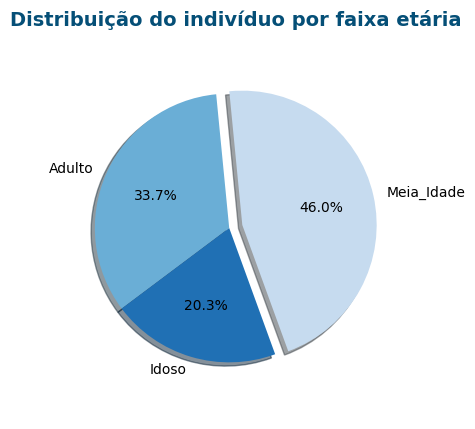

In [51]:
# Calcular a contagem de cada categoria
counts = lifestyle_data['Cat_Age'].value_counts()
rotulos = counts.index
explode = tuple([0.1] + [0.0] * (len(rotulos) - 1))

# Obtenha uma paleta de cores de tons de azul usando seaborn
tons_de_azul = sns.color_palette("Blues", len(rotulos))

# Definindo as linhas gerais do gráfico
plt.figure(figsize = (4, 5))
plt.pie(x = counts, labels = rotulos, explode = explode, autopct = '%1.1f%%', startangle=-70, shadow=True, colors=tons_de_azul)
plt.title( 'Distribuição do indivíduo por faixa etária' , weight = "bold", color = "#054F77", fontsize = 14)
plt.axis( 'equal' )
plt.show()


A maioria dos registros em nosso conjunto de dados pertence à faixa etária de meia-idade, com uma presença mais significativa de adultos em comparação aos idosos.

**Avaliando a distribuição  de frequências**

---

Para avaliar a distribuição de frequências das variáveis iremos utilizar gráficos de histograma e de densidade para cada um destes atributos numéricos do dataset.

Utilizaremos ainda o gráfico de boxplot para verificar a existência de outliers.

**Histograma**

---
Criamos em seguida um histograma para cada atributo numérico do dataset.

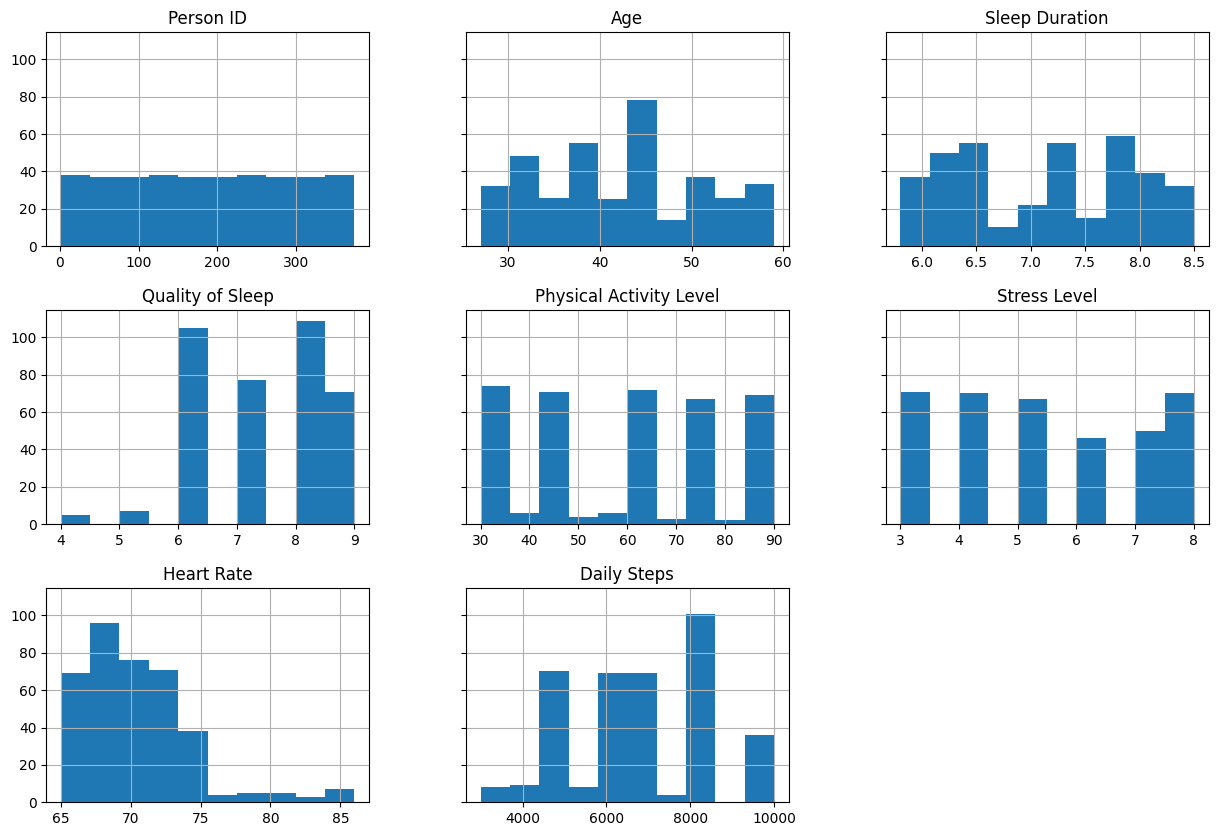

In [52]:
# Histograma
lifestyle_data.hist(figsize = (15,10),sharey = True)
plt.show()


Nessa etapa de analise iremos excluir o atributo "Person ID", pois ele é a nossa chave primaria e não serve como dado estatístico, pelos gráficos acima verificamos que de todos os outros 7 atributos numéricos apenas os atributos **Age** e o **Daily Steps** possuem um valor central, o atributo **Heart Rate** é assimétrico a esquerda.

**Density Plot**

---
Faremos agora o gráfico Density Plot, que é similar com o histograma, mas com uma visualização um pouco diferente. Com ele pode ser mais fácil identificar a distribuição dos atributos do dataset.

Assim como fizemos com o histograma, vamos criar um density plot para cada atributo numérico do dataset.

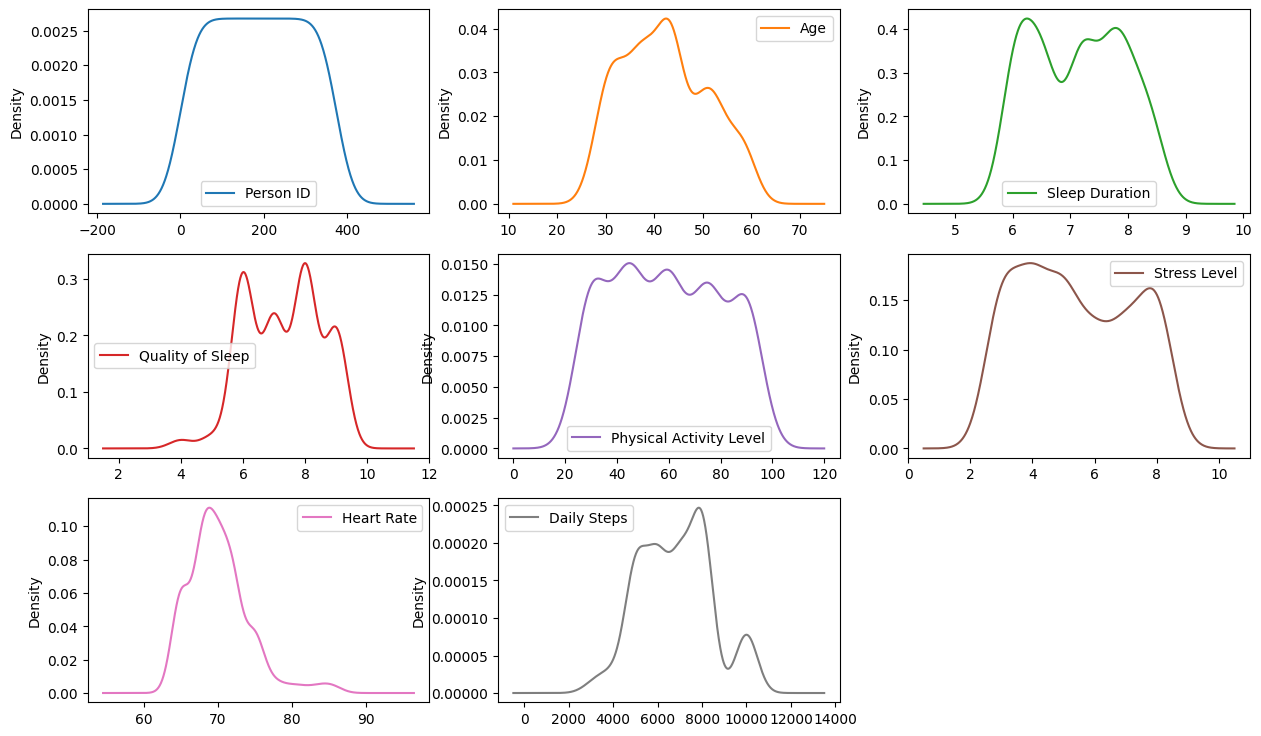

In [53]:
# Density Plot
lifestyle_data.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,9))
plt.show()

Conforme fizemos ao analisar o histograma iremos excluir o atributo "Person ID", pois ele é a nossa chave primaria e não serve como dado estatístico. Nesse caso vemos que muitos dos atributos têm uma **distribuição distorcida** ao analisar o Density Plot.

**Determinando os Outliers**

---
Em seguida, utilizarei gráficos de boxplots para visualmente observar a existência de outliers nas variáveis.

A linha no centro representa o valor da mediana (segundo quartil ou p50). A linha abaixo é o 1o quartil (p25) e a linha acima o terceiro quartil (p75). O *boxplot* ajuda a ter uma ideia da dispersão dos dataset e seus possíveis outliers.

> *OBS: Se um ponto do dataset é muito distante da média (maior ou menor que 3 vezes o desvio padrão), ele pode ser considerado um outlier.*


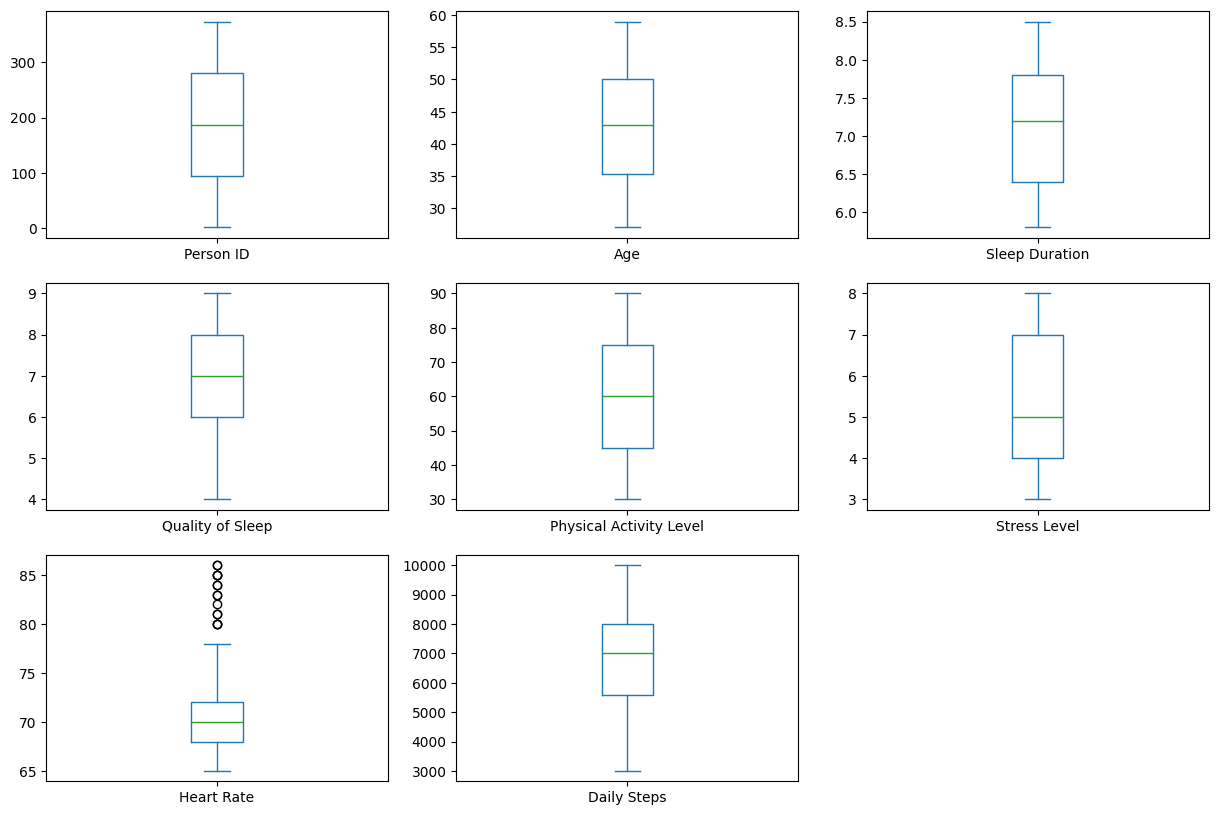

In [54]:
# Boxplot
lifestyle_data.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

Podemos confirmar que dos 8 atributos numéricos do dataset 7 são uniformes e não possuem *outliers* onde apenas no atributo **Heart Rate** temos presença de *outliers*. No entanto, optaremos por não abordar esses valores discrepantes, uma vez que não exercem impacto prejudicial em nossa análise.


### 3.3 Visualizações Multimodais

---
Nessa seção faremos perguntas e visualizações gráficas de relações entre dois ou mais atributos.

**Dentro do atributo Sleep Disorder (Transtorno do Sono), qual é o mais comum nos indivíduos avaliados?**

---

Para responder esse questionamento iremos utilizar o histograma que irá nos demostrar a distribuição de transtorno por indivíduo.

In [55]:
# Crie o histograma usando Plotly Express
fig = px.histogram(lifestyle_data, x='Sleep Disorder',
                   color='Sleep Disorder',
                   color_discrete_sequence=['#66C0DC','#054F77','#007AA2'],
                   text_auto=True)

# Atualize o layout do gráfico
fig.update_layout(title='<b>Análise de Transtorno por Indivíduo</b>',
                  title_font={'size': 20},
                  title_x=0.5,
                  paper_bgcolor='#DFE9F5',
                  plot_bgcolor='#DFE9F5')

# Atualize o rótulo do eixo x e y
fig.update_xaxes(title_text='Transtorno do Sono')
fig.update_yaxes(title_text='Identificação da Pessoa')

# Exiba o gráfico
fig.show()


Claramente, a maioria das pessoas na amostra é classificada como **none** (normal), em contraste com uma proporção menor que possui transtornos.

**Qual é a ocupação que possui mais transtornos de sono?**

---
Para responder esse questionamento iremos utilizar o treemap que irá nos demostrar a distribuição de transtorno por ocupação.  

In [56]:
# Crie o treemap usando Plotly Express com cores personalizadas
fig=px.treemap(lifestyle_data,path=[px.Constant('Jobs'),'Sleep Disorder','Occupation'],
               color='Sleep Disorder',
               color_discrete_sequence=['#66C0DC','#054F77','#007AA2','#DFE9F5'])

# Atualize o layout do gráfico
fig.update_layout(title='<b>O efeito da profissão no sono</b>',
                 title_font={'size':20},title_x=0.5,)

# Mostrando o gráfico
fig.show()

Ao analisar o gráfico acima, observamos que enfermeiros, vendedores e professores são as ocupações mais suscetíveis a apneia do sono e insônia. Vale ressaltar que entre as profissões que não apresentam transtornos do sono, encontram-se médicos, engenheiros e advogados.

É interessante notar que as ocupações afetadas pelos transtornos do sono tendem a ter remuneração mais baixa e carga horária mais extensa, em contraste com as profissões sem transtornos do sono, que são consideradas as mais bem remuneradas, conforme indicado na fonte abaixo:


Fonte: https://valor.globo.com/carreira/noticia/2023/10/17/as-18-profissoes-mais-bem-pagas-do-brasil-em-2023-segundo-a-fgv.ghtml.

**Qual é o gênero que possui mais transtornos de sono?**

---
Para responder esse questionamento iremos utilizar o gráfico de barras que irá nos demostrar a distribuição de transtorno por gênero.  

In [57]:
# Agrupe os dados e conte as ocorrências para cada combinação
grouped_data = lifestyle_data.groupby(['Sleep Disorder', 'Gender']).size().reset_index(name='Count')

# Crie o gráfico de barras usando Plotly Express
fig = px.bar(grouped_data, x='Sleep Disorder', y='Count', color='Gender',
             labels={'Sleep Disorder': 'Distúrbio do Sono', 'Count': 'Contagem'},
             color_discrete_sequence=['#66C0DC', '#054F77'],
             text_auto=True)

# Atualize o layout do gráfico
fig.update_layout(title='<b>Relação entre Gênero e Distúrbio do Sono</b>',
                  title_font={'size': 20},
                  title_x=0.5,
                  paper_bgcolor='#DFE9F5',
                  plot_bgcolor='#DFE9F5')

# Exiba o gráfico
fig.show()


In [58]:
lifestyle_data.groupby('Gender')['Sleep Disorder'].value_counts()

Gender  Sleep Disorder
Female  None               82
        Sleep Apnea        67
        Insomnia           36
Male    None              137
        Insomnia           41
        Sleep Apnea        11
Name: Sleep Disorder, dtype: int64

Analisando o gráfico acima, observamos que os homens apresentam um padrão considerado normal, enquanto as mulheres são identificadas como o grupo que enfrenta um maior impacto de distúrbios do sono.

A observação de que as mulheres apresentam um maior impacto de distúrbios do sono em comparação aos homens pode ser explicada por uma combinação de fatores biológicos, psicológicos e sociais. Aqui estão algumas razões que podem contribuir para essa disparidade:

**Variações Hormonais:** Mudanças nos níveis hormonais ao longo do ciclo menstrual e durante a gravidez podem afetar o padrão do sono nas mulheres. Flutuações hormonais, como aquelas associadas à menopausa, também podem influenciar a qualidade do sono.

**Estresse e Ansiedade:** As mulheres, muitas vezes, enfrentam pressões sociais e expectativas relacionadas ao trabalho, à família e à vida pessoal. O estresse e a ansiedade associados a essas responsabilidades podem impactar negativamente o sono.

**Insônia Relacionada a Transtornos Emocionais:** Mulheres têm uma prevalência mais alta de transtornos emocionais, como depressão e ansiedade, que estão associados a distúrbios do sono, como a insônia.

**Ciclo Circadiano Sensível:** Algumas pesquisas sugerem que as mulheres podem ter um ciclo circadiano mais sensível, o que pode influenciar seus padrões de sono.

**Responsabilidades Familiares:** Mulheres frequentemente desempenham papéis de cuidadoras na família. Isso pode resultar em interrupções no sono devido a responsabilidades familiares noturnas.

**Diferenças Genéticas:** Existem diferenças genéticas entre homens e mulheres que podem influenciar a suscetibilidade a distúrbios do sono.


**Como ter uma boa noite de sono está relacionada as transtornos de sono?**

---
Para responder esse questionamento iremos utilizar o gráfico de barras que irá nos demostrar a distribuição de transtorno por duração de sono.  

In [59]:
# Crie o gráfico de barras usando Plotly Express
fig=px.histogram(lifestyle_data,x='Sleep Disorder',y='Sleep Duration',
                 color='Sleep Disorder',color_discrete_sequence=['#66C0DC','#054F77','#007AA2'],
                 text_auto=True)


# Atualize o layout do gráfico
fig.update_layout(title='<b>O efeito de uma boa noite de sono em relação ao distúrbio do sono</b> ',
                  titlefont={'size': 24,'family': 'Serif'},
                  showlegend=True,
                  title_x=0.5,
                  paper_bgcolor='#DFE9F5',
                  plot_bgcolor='#DFE9F5')

# Atualize o rótulo do eixo y e do eixo para 'Indivíduos'
fig.update_yaxes(title_text='Soma da Duração do Sono')
fig.update_xaxes(title_text='Distúrbio do Sono')

# Exiba o gráfico
fig.show()


Analisando as horas de sono em relação aos diferentes distúrbios do sono, observamos que:

Indivíduos com Apneia do Sono dormiram um total de **548 horas**.
Aqueles que enfrentam a Insônia tiveram um total de **507 horas** de sono.
Por outro lado, aqueles sem transtornos do sono desfrutaram de uma soma significativamente maior, totalizando **1611 horas** de sono.
Esses números destacam a importância crucial de uma boa noite de sono para a saúde geral. A qualidade e a quantidade adequada de sono desempenham um papel vital na promoção do bem-estar físico e mental. A privação do sono, causada por distúrbios como a Apneia do Sono e Insônia, pode impactar negativamente a saúde, a cognição e o funcionamento diário.

Reforça-se a necessidade de abordar e gerenciar distúrbios do sono, buscando estratégias para melhorar a qualidade do sono. Isso não apenas beneficia a saúde a curto prazo, mas também contribui para uma vida mais saudável e produtiva a longo prazo.

**Dentro da Categoria de IMC, qual é a que possui mais transtornos de sono?**

---
Para isso iremos usar  um gráfico de pizza para visualizar a distribuição de transtornos do sono em diferentes categorias de BMI Category (índice de massa corporal).

A função pivot_table será usada para organizar os dados de maneira que seja possível contar a quantidade de cada tipo de distúrbio do sono para cada categoria de BMI. Em seguida, um gráfico de pizza é gerado usando o método plot.pie.


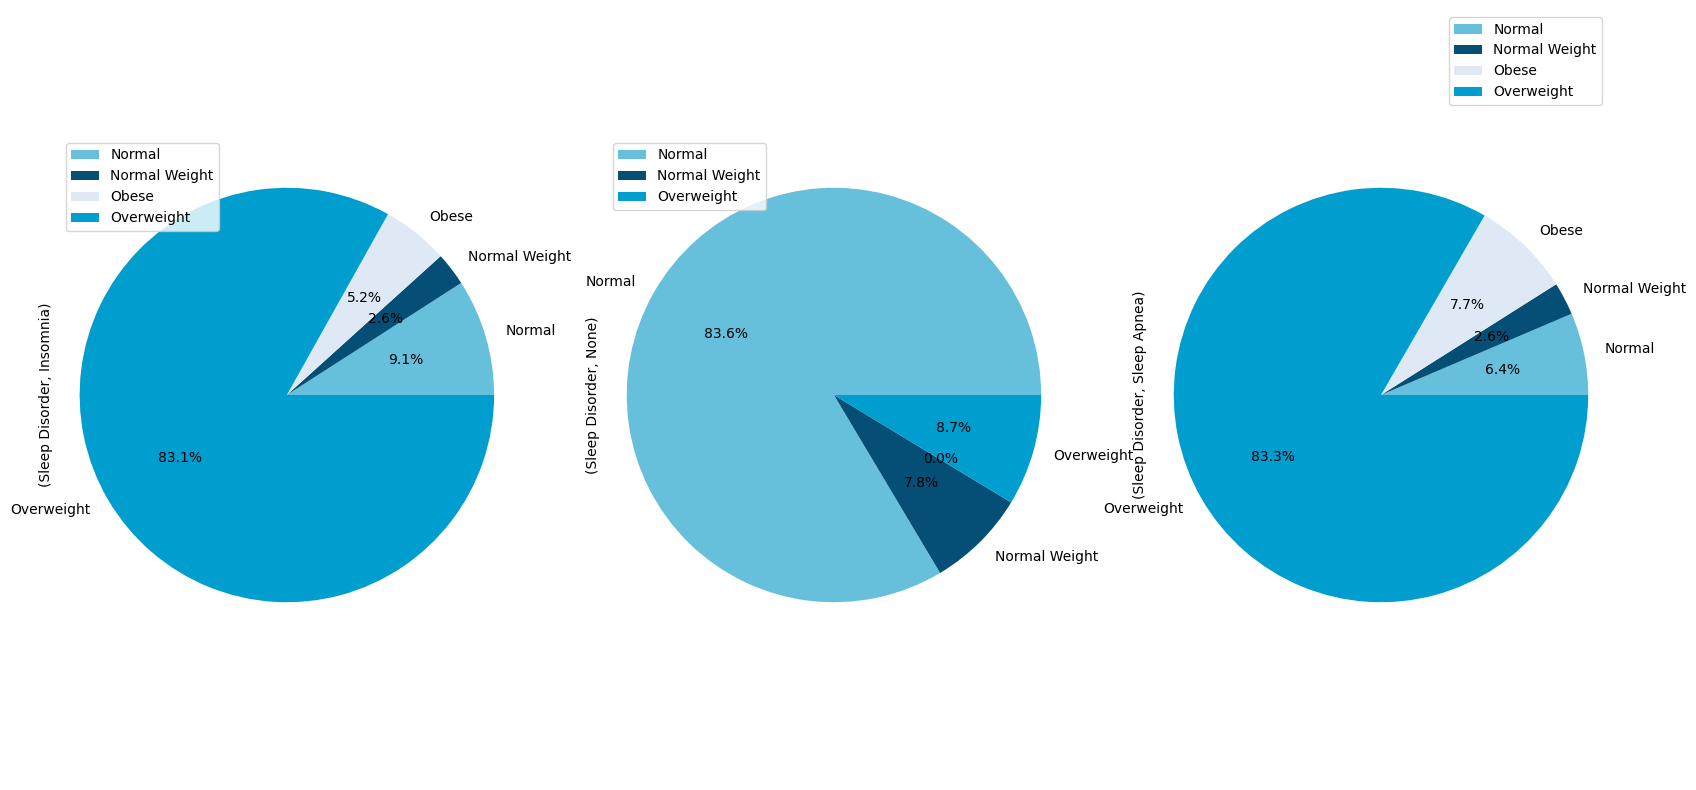

In [60]:
lifestyle_data.pivot_table(index='BMI Category',columns='Sleep Disorder',
                           aggfunc={'Sleep Disorder':'count'}).plot.pie(autopct ='%1.1f%%',
                                                                        subplots=True,figsize=(20,10),
                                                                        colors=['#66C0DC', '#054F77','#DFE9F5','#009DCF'])

plt.axis('equal')
plt.show()

Essa representação visual ajuda a comparar a prevalência dos diferentes distúrbios do sono em cada faixa de Índice de Massa Corporal, proporcionando uma visão rápida das relações entre essas variáveis.
Analisando  os dados acima é possível  chegar as seguintes conclusões:

Os dados revelam uma relação significativa entre os transtornos do sono e as condições de sobrepeso e obesidade. Notavelmente, em casos onde não há transtornos do sono, apenas **8,7%** dos indivíduos são identificados como estando com sobrepeso. No entanto, quando há a presença de insônia ou apneia do sono, observamos que os casos de sobrepeso e obesidade combinados atingem valores expressivos, situando-se entre **88% e 90%**.

Essa associação sugere fortemente que melhorar hábitos alimentares e promover a melhoria da condição física pode desempenhar um papel crucial na gestão e prevenção de transtornos do sono. Recomenda-se uma abordagem holística, incluindo mudanças na dieta e prática regular de atividade física, como medidas efetivas para melhorar a qualidade do sono e promover um estilo de vida saudável.

**Matplotib Seaborn**

---

Para verificar se existe alguma correlação de atributos de um dataset, a matriz de correlação de Pearson costuma ser a ferramenta mais apropriada, já que ela mostra o grau de relação linear entre cada par de variáveis, no formato de uma matriz bidimensional. Como vimos antes, os seus valores podem ter variar entre -1 e +1. Se os dois atributos tendem a aumentar e diminuir juntas, o valor de sua correlação é positivo. Se um atributo de coluna aumenta enquanto o outro diminui, o valor de correlação é negativo. Quando está póximo de zero, não há correlação entre os atributos.

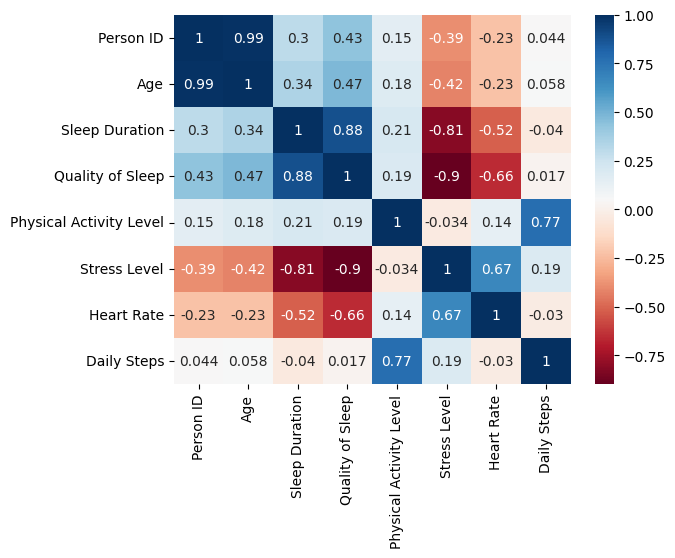

In [61]:
# Matriz de Correlação com Matplotlib Seaborn

sns.heatmap(lifestyle_data.corr(), annot=True, cmap='RdBu');


Ao visualizar as correlações entre os atributos de coluna através da matriz de correlação, percebemos que há poucas correlações fortes no dataset.


**Scatter Plot**

---
Por sua vez, o gráfico de dispersão (**scatter plot**) mostra o relacionamento entre duas variáveis. Vamos exibir um gráfico para cada par de atributo de coluna dos dataset, usando o *seaborn* variações 1


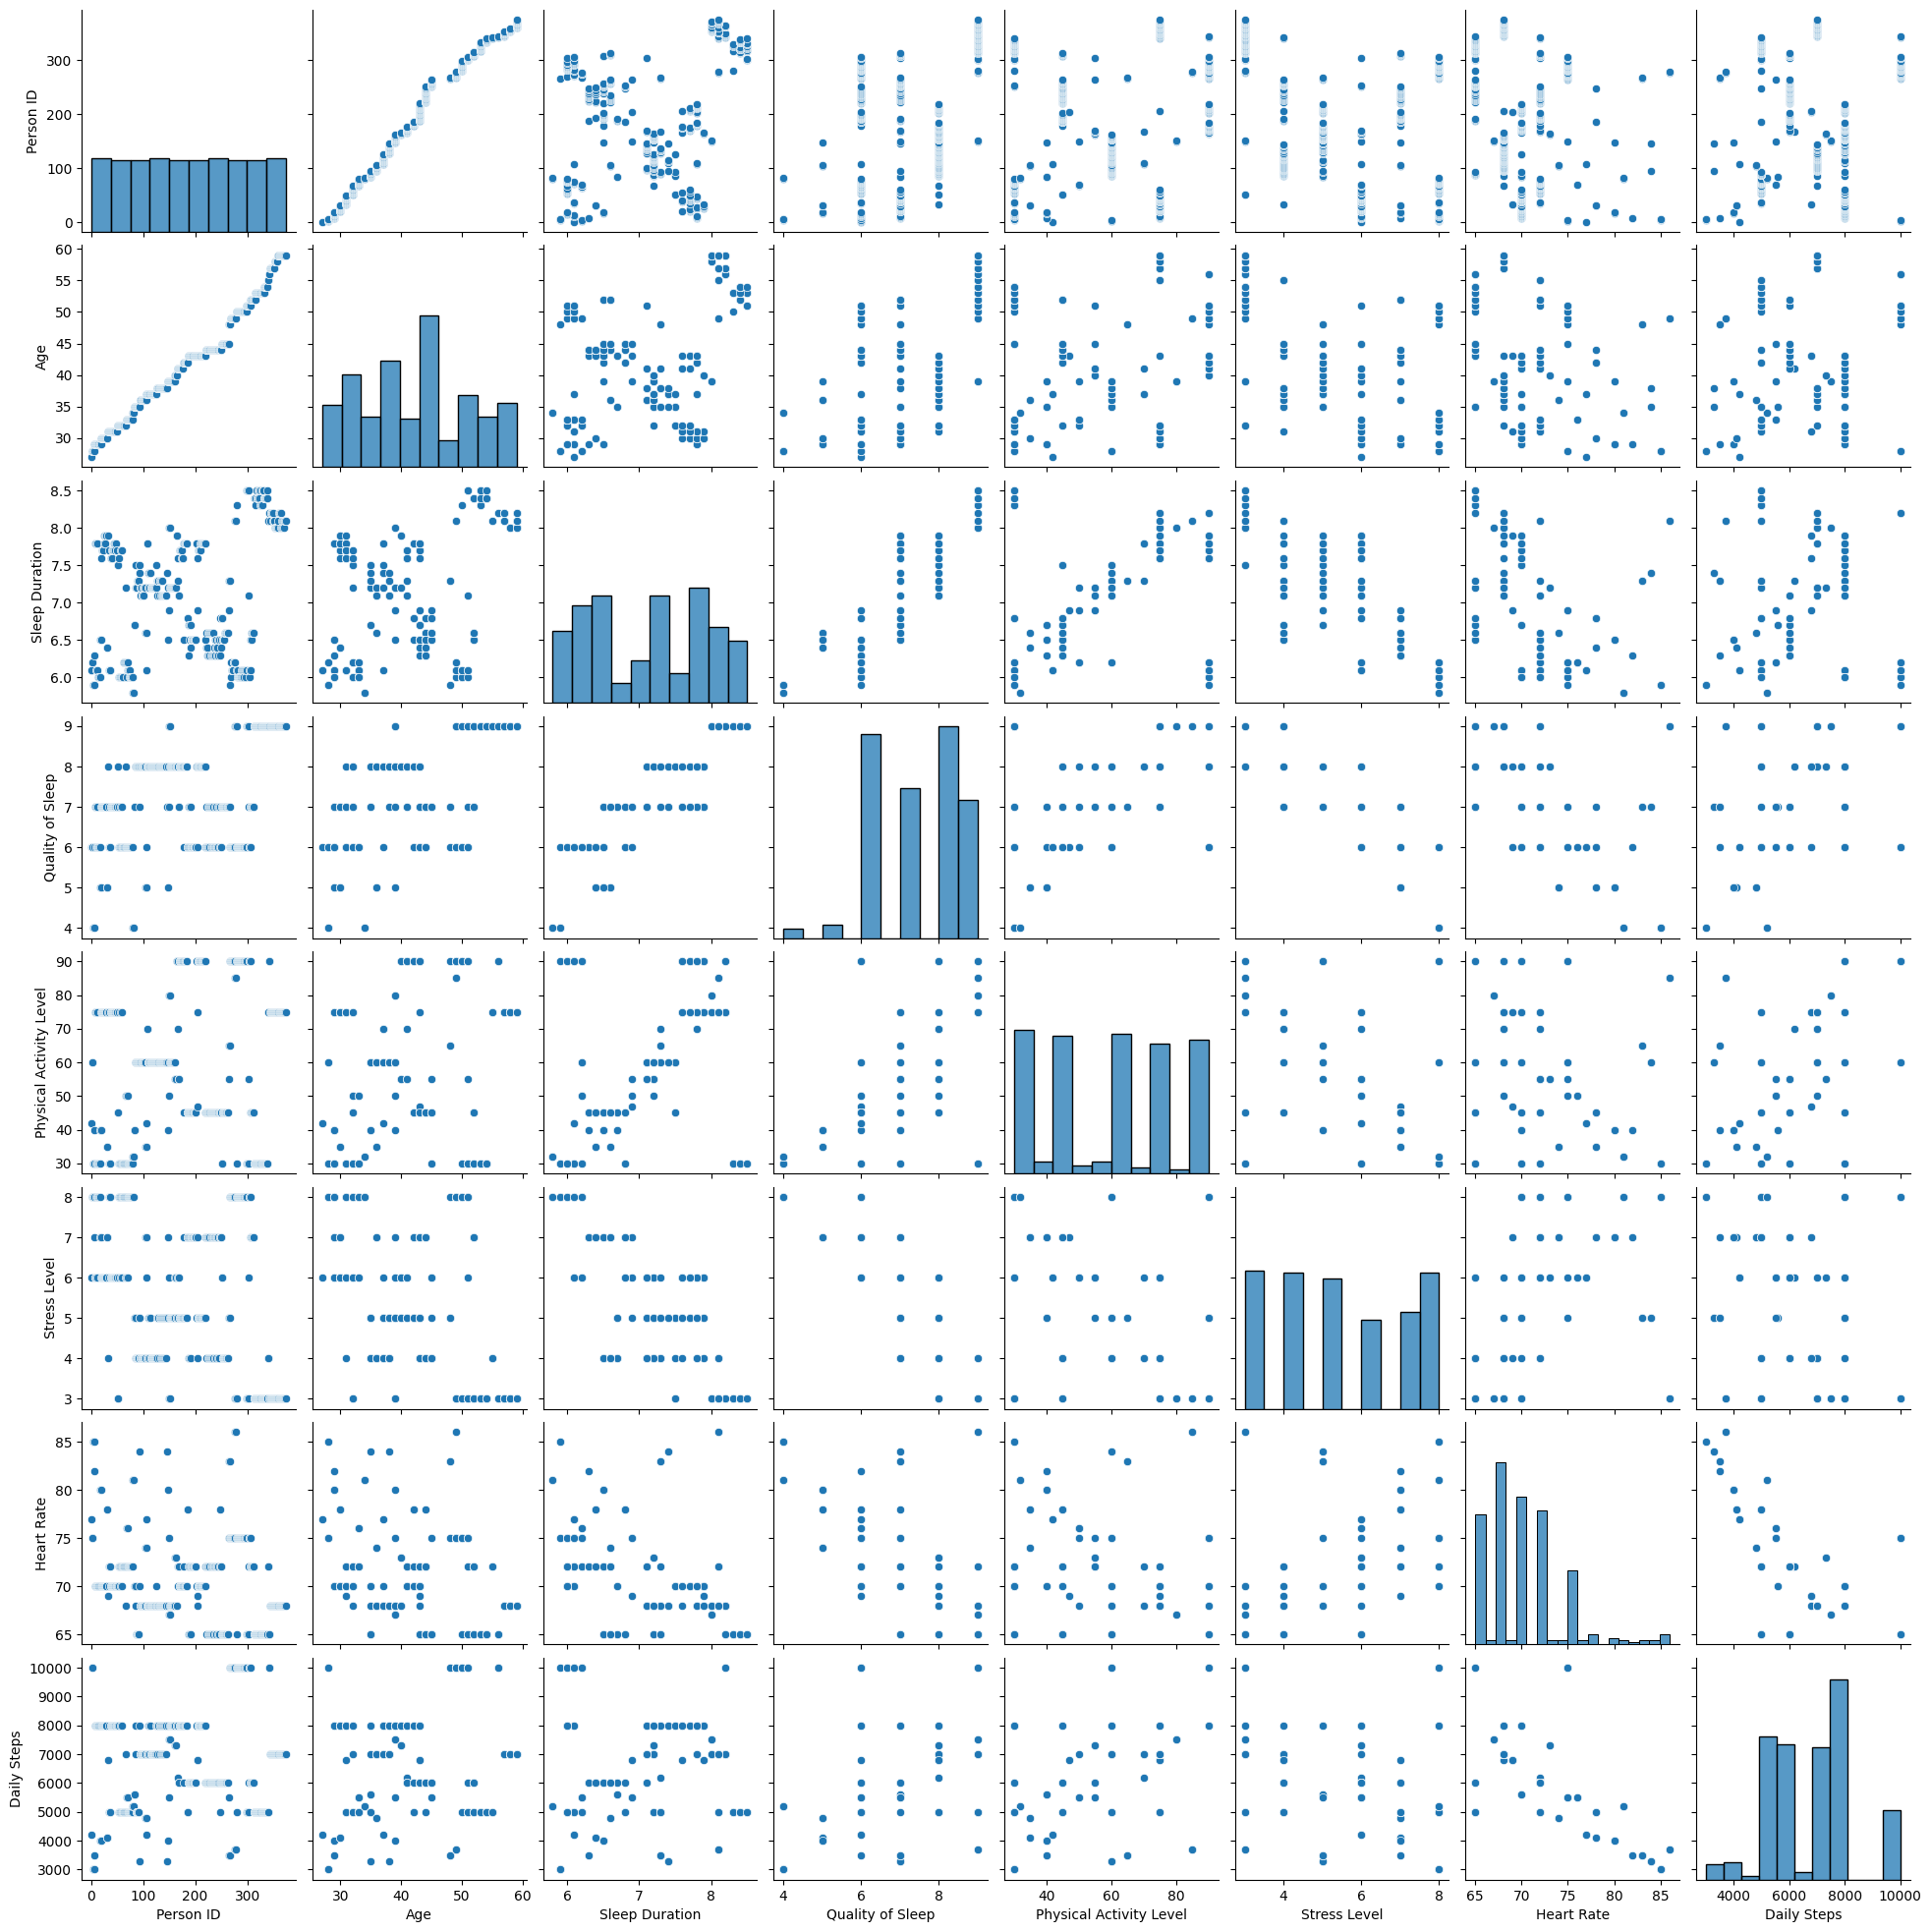

In [62]:
# Scatter Plot com Seaborn - Variação 1

sns.pairplot(lifestyle_data)

## 4.0 Pré-Processamento de dados
---
Nesta etapa, iremos realizar diversas operações de preparação de dados, como por exemplo, tratamento de valores missings (faltantes), limpeza de dados, e se necessário transformações.

### 4.1 Tratamento de Missings e Limpeza
---

Nesta etapa, procuraremos identificar e eliminar quaisquer irregularidades presentes no conjunto de dados, visando aprimorar e elevar sua qualidade. O processo de limpeza de dados inclui a verificação da coerência das informações, a correção de eventuais erros e a gestão de valores nulos e/ou redundantes, seja preenchendo-os adequadamente ou removendo-os.

Produziremos nesse momento o tratamento e as manipulações em um *dataset* provisório, preservando o *dataset* original.

In [63]:
# Salvando um NOVO dataset para tratamento de missings, com cuidado para não sobrescrever o dataset original
lifestyle_data_limpo = lifestyle_data

Como já havíamos verificado anteriormente, não temos redundância no *dataset*, já que temos 374 valores "Person ID" diferentes (únicos).

In [64]:
lifestyle_data_limpo.nunique()

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               3
Cat_Age                      3
dtype: int64

Confirmaremos a existência de dados nulos (*NULL*) para cada atributo do *dataset*.

In [65]:
# # Verificando dados nulos nos atributos
lifestyle_data_limpo.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
Cat_Age                    0
dtype: int64

Corfome visto anteriormente não possuimos valores nulos para tratamento.

**Visualização Matricial**

---
Usaremos a *Visualização Matricial* para ver o que não existe!
Onde nos será mostrado uma matriz dos atributos na qual riscos brancos significam a existência de dados faltantes, e quanto mais riscos mais dados faltam.


<Axes: >

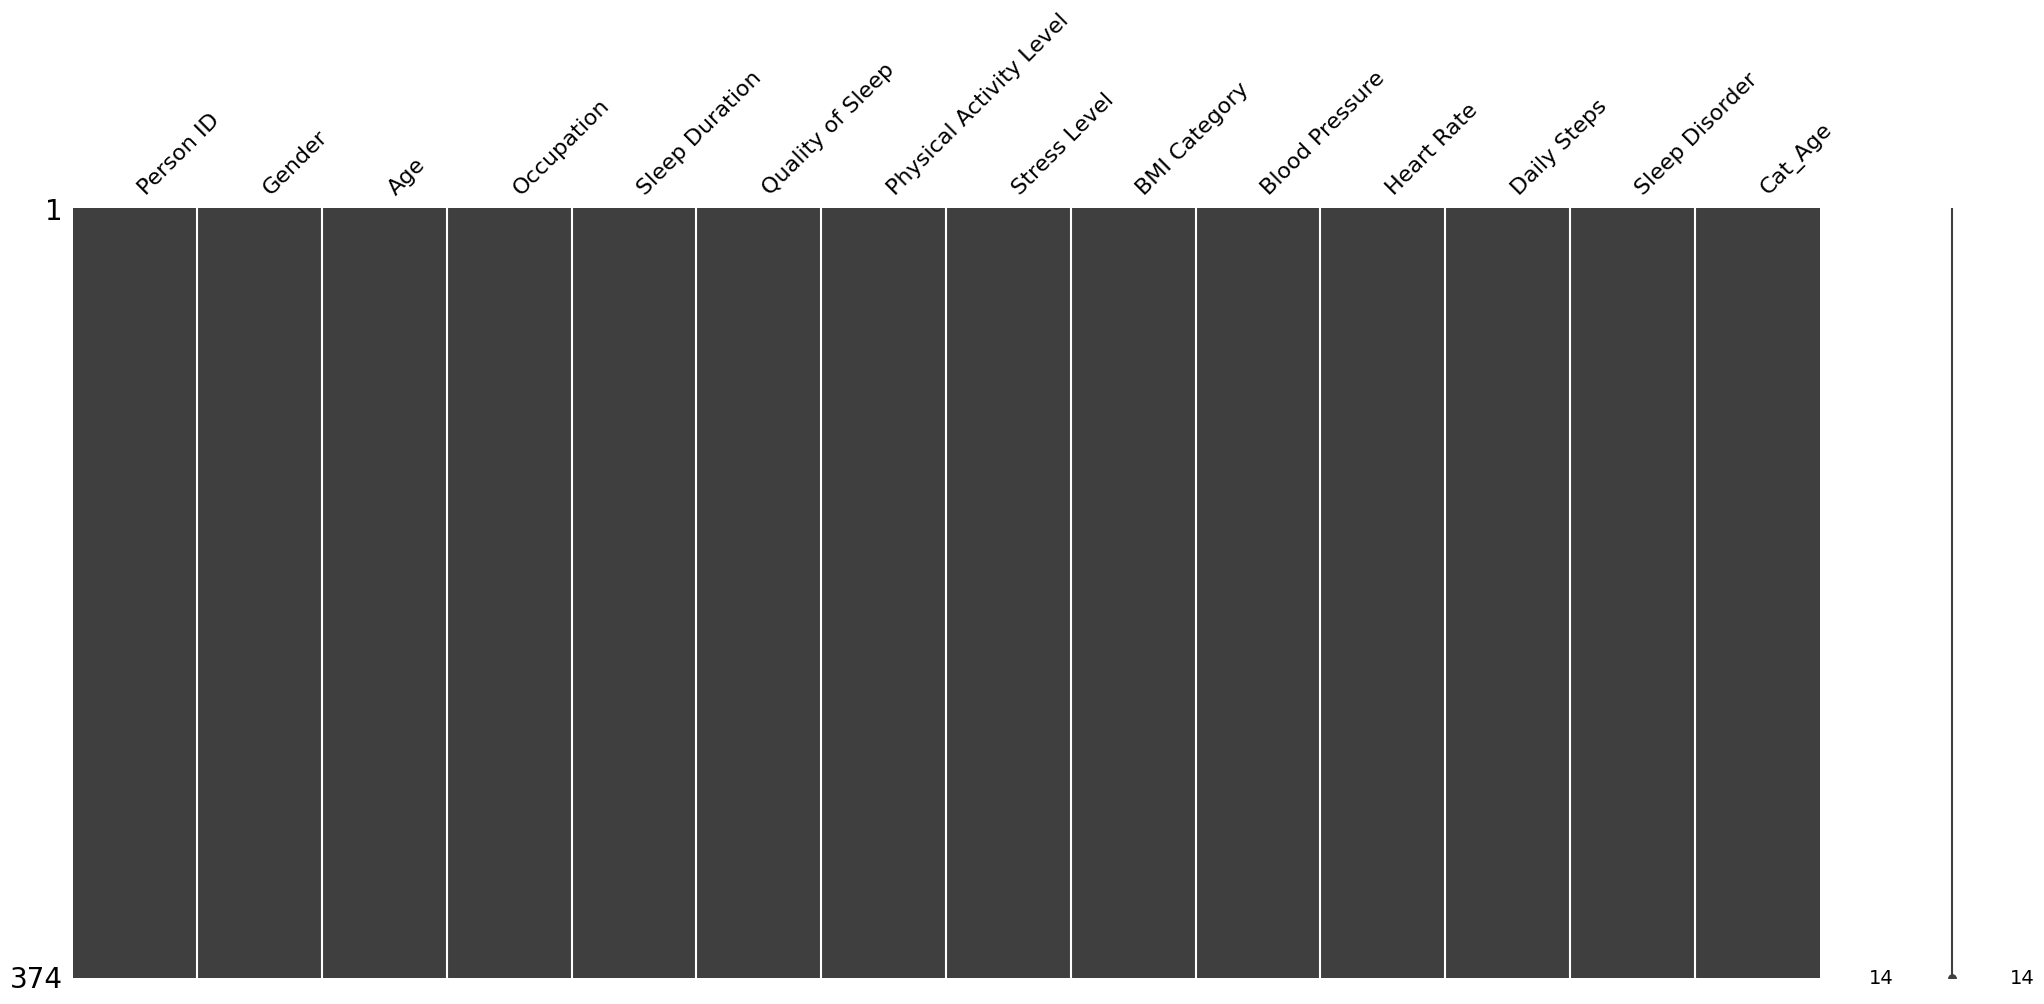

In [66]:
# Exibindo visualização matricial da nulidade do dataset provisório
ms.matrix(lifestyle_data_limpo)

Podemos observar que:

•	O dataset não apresenta valor nulo no conjunto de dados analisado.

•	Não há variáveis duplicadas.

Ao final dessa seção, vimos que não foi necessário tratamento no nosso *dataset*.


## 5.0 Conclusão
---

No decorrer desse MVP foi possível  exercitar técnicas de coleta e análise de dados, pré-processamento, tratamento dos dados e apresentação de resultados, que auxiliaram na implementação de um modelo capaz de, futuramente, gerar valor à tomada de decisão auxiliando a previsões relacionadas a distúrbios do sono.

A compreensão dos distúrbios do sono implica reconhecer a influência significativa de fatores externos, como ambiente, estilo de vida, estresse e condições de saúde. A correlação entre distúrbios do sono e condições de saúde mental, como ansiedade e depressão, assim como com condições físicas, como obesidade e sobrepeso, destaca a complexidade interconectada desses fenômenos.

Além disso, observa-se uma possível diferenciação de prevalência entre mulheres e homens, sugerindo que fatores hormonais e sociais podem desempenhar um papel nessa disparidade. Certas ocupações, caracterizadas por horários de trabalho irregulares, estresse ocupacional ou exposição a ambientes específicos, podem tornar os indivíduos mais suscetíveis a distúrbios do sono.

Adicionalmente, estilos de vida sedentários, práticas alimentares inadequadas emergem como elementos que podem contribuir para uma maior incidência de distúrbios do sono.

A prevenção dos distúrbios do sono pode envolver a adoção de hábitos e práticas saudáveis no estilo de vida, bem como a gestão de fatores externos. Algumas estratégias que podem contribuir para a prevenção desses distúrbios incluem:

**Manter um Horário Regular de Sono:**
Estabelecer uma rotina consistente de sono, indo para a cama e acordando no mesmo horário todos os dias, mesmo nos fins de semana.

**Praticar Atividade Física Regular:**
Incorporar exercícios físicos regularmente, mas evitar atividades intensas muito próximas da hora de dormir.

**Gestão do Estresse:**
Incorporar técnicas de gestão do estresse, como meditação, respiração profunda ou yoga, para promover um estado mental tranquilo antes de dormir.

**Avaliação e Tratamento Médico:**
Procurar orientação médica se os distúrbios do sono persistirem, para uma avaliação adequada e possível tratamento, como terapias comportamentais, medicamentos ou outras intervenções personalizadas.


Através da análise dos dados, constatou-se que a adoção de uma rotina de sono saudável, aliada a hábitos alimentares adequados e prática regular de atividades físicas, constitui uma poderosa estratégia para prevenir potenciais transtornos do sono. Essa sinergia entre qualidade de sono, nutrição equilibrada e exercícios físicos demonstra ser uma abordagem integrada e eficaz na promoção de um sono repousante e na preservação da saúde do sono.